# 1. Data Quality Assessment & Cleaning

## 1.1 Import Data Set

In [21]:
import pandas as pd

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load the sales data
sales_df = pd.read_csv(
    '/content/drive/My Drive/RDAMP Internship/Task 1/Ace Superstore Retail Dataset(in).csv',
    encoding='ISO-8859-1'
)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1.2 Find Missing Values

In [22]:
# Show how many missing values are in each column
sales_df.isnull().sum()

,0
Order ID,0
Order Date,0
Order Mode,0
Customer ID,0
City,0
Postal Code,0
Country,220
Region,2811
Product ID,0
Product Name,0


## 1.3 Check for duplicates

In [23]:
# Count duplicate rows
sales_df.duplicated().sum()

# Optionally view duplicates
sales_df[sales_df.duplicated()]

,Order ID,Order Date,Order Mode,Customer ID,City,Postal Code,Country,Region,Product ID,Product Name,Category,Sub-Category,Sales,Cost Price,Quantity,Discount


## 1.4 Check for Anomalies

In [24]:
sales_df[sales_df['Cost Price'] <= 0]
sales_df[(sales_df['Quantity'] <= 0) | (sales_df['Quantity'] > 1000)]
sales_df[(sales_df['Discount'] < 0) | (sales_df['Discount'] > 1)]

,Order ID,Order Date,Order Mode,Customer ID,City,Postal Code,Country,Region,Product ID,Product Name,Category,Sub-Category,Sales,Cost Price,Quantity,Discount


## 1.5 Visualise Missing Data

<Axes: >

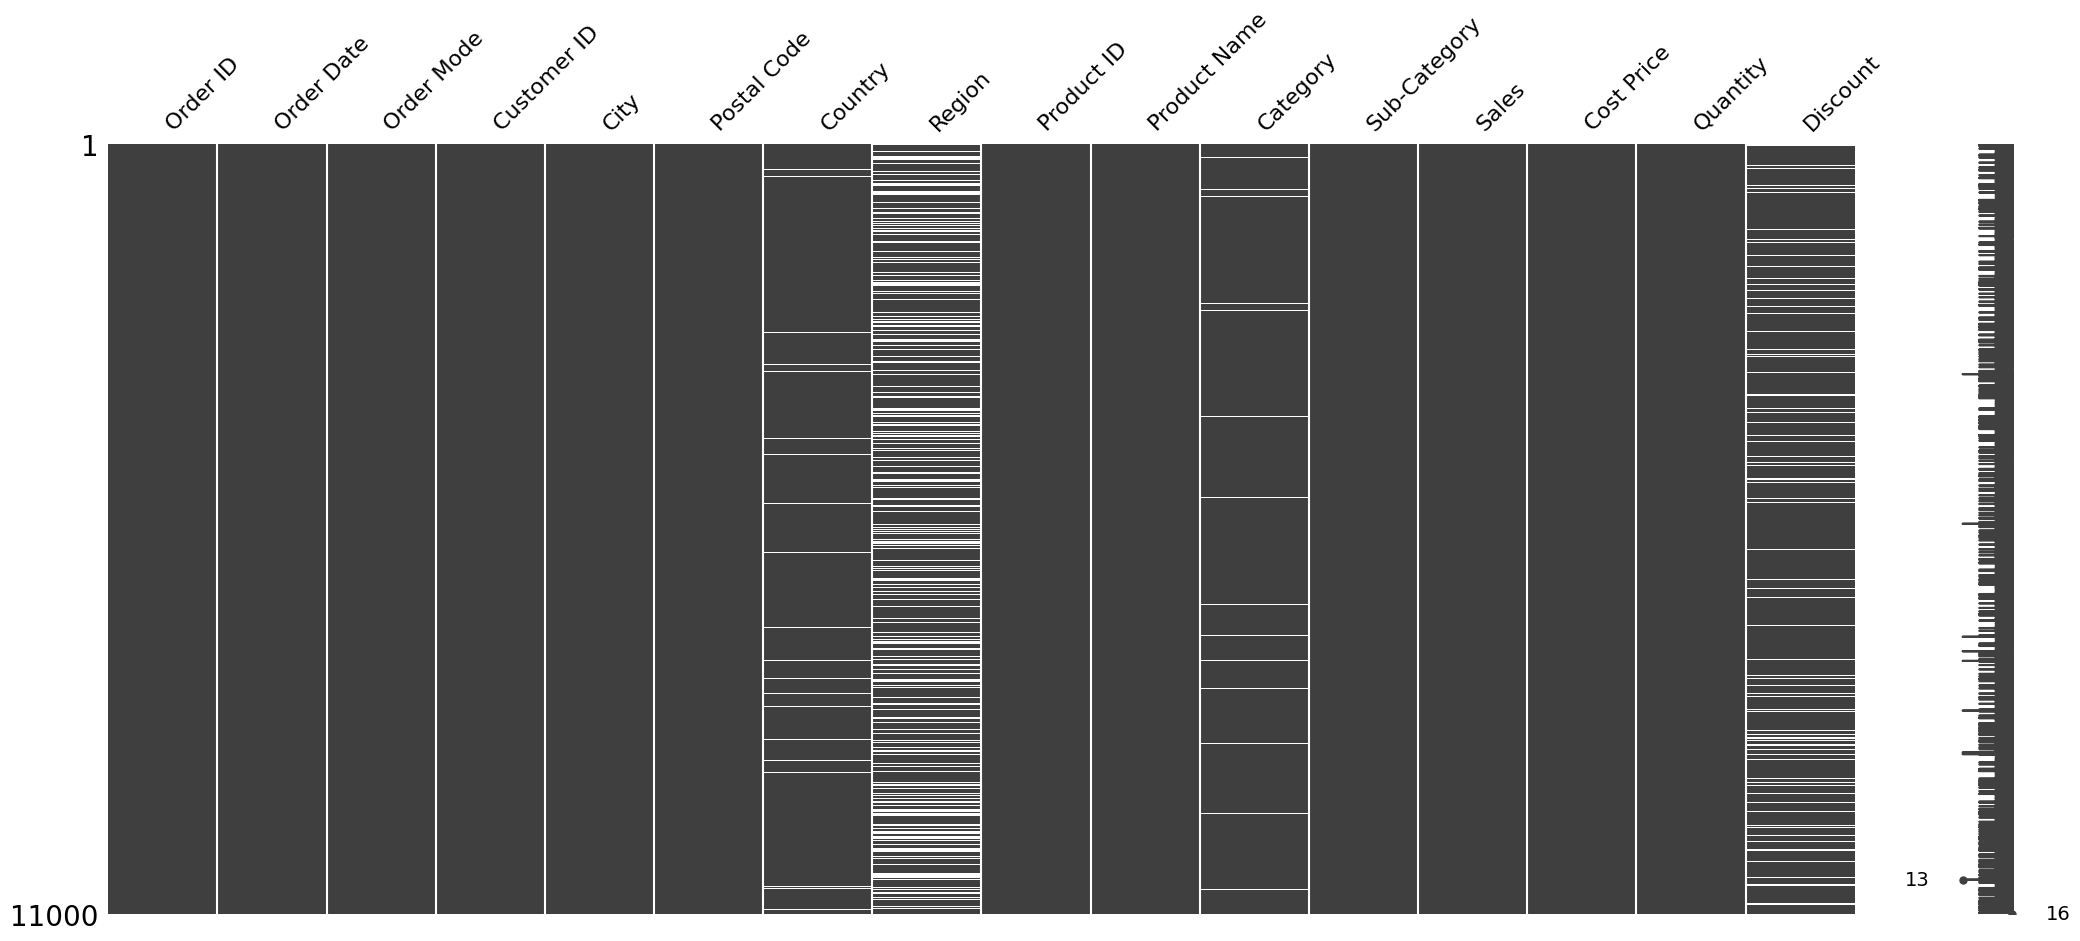

In [25]:
import missingno as msno
msno.matrix(sales_df)

## 1.6 Fix Missing Values

### 1.6.1 Regions

In [26]:
# Build a City to Region lookup dictionary
city_region_map = sales_df[sales_df['Region'].notnull()].drop_duplicates(subset=['City', 'Region'])
city_to_region = dict(zip(city_region_map['City'], city_region_map['Region']))

# Fill missing Region values
sales_df['Region'] = sales_df.apply(
    lambda row: city_to_region.get(row['City'], row['Region']),
    axis=1
)

# Fill any leftovers as 'Unknown'
sales_df['Region'] = sales_df['Region'].fillna('Unknown')

### 1.6.2 Categories

In [27]:
subcat_cat_map = sales_df[sales_df['Category'].notnull()].drop_duplicates(subset=['Sub-Category', 'Category'])
subcat_to_cat = dict(zip(subcat_cat_map['Sub-Category'], subcat_cat_map['Category']))

sales_df['Category'] = sales_df.apply(
    lambda row: subcat_to_cat.get(row['Sub-Category'], row['Category']),
    axis=1
)

### 1.6.3 Discounts

In [28]:
sales_df['Discount'] = sales_df['Discount'].fillna(0)

### 1.6.4 Countries

In [29]:
# Only use rows where both Country and Region are not missing
valid_geo_rows = sales_df[sales_df['Country'].notnull() & sales_df['Region'].notnull()]

# Drop duplicates so we only keep unique Region–Country pairs
region_to_country = dict(
    valid_geo_rows.drop_duplicates(subset=['Region', 'Country'])[['Region', 'Country']].values
)

# Fill missing countries using the mapping from region
sales_df['Country'] = sales_df.apply(
    lambda row: region_to_country.get(row['Region'], row['Country']),
    axis=1
)

# Fill any leftovers with 'Unknown'
sales_df['Country'] = sales_df['Country'].fillna('Unknown')

## 1.7 Check for Errors

### Visualise Missing Values

<Axes: >

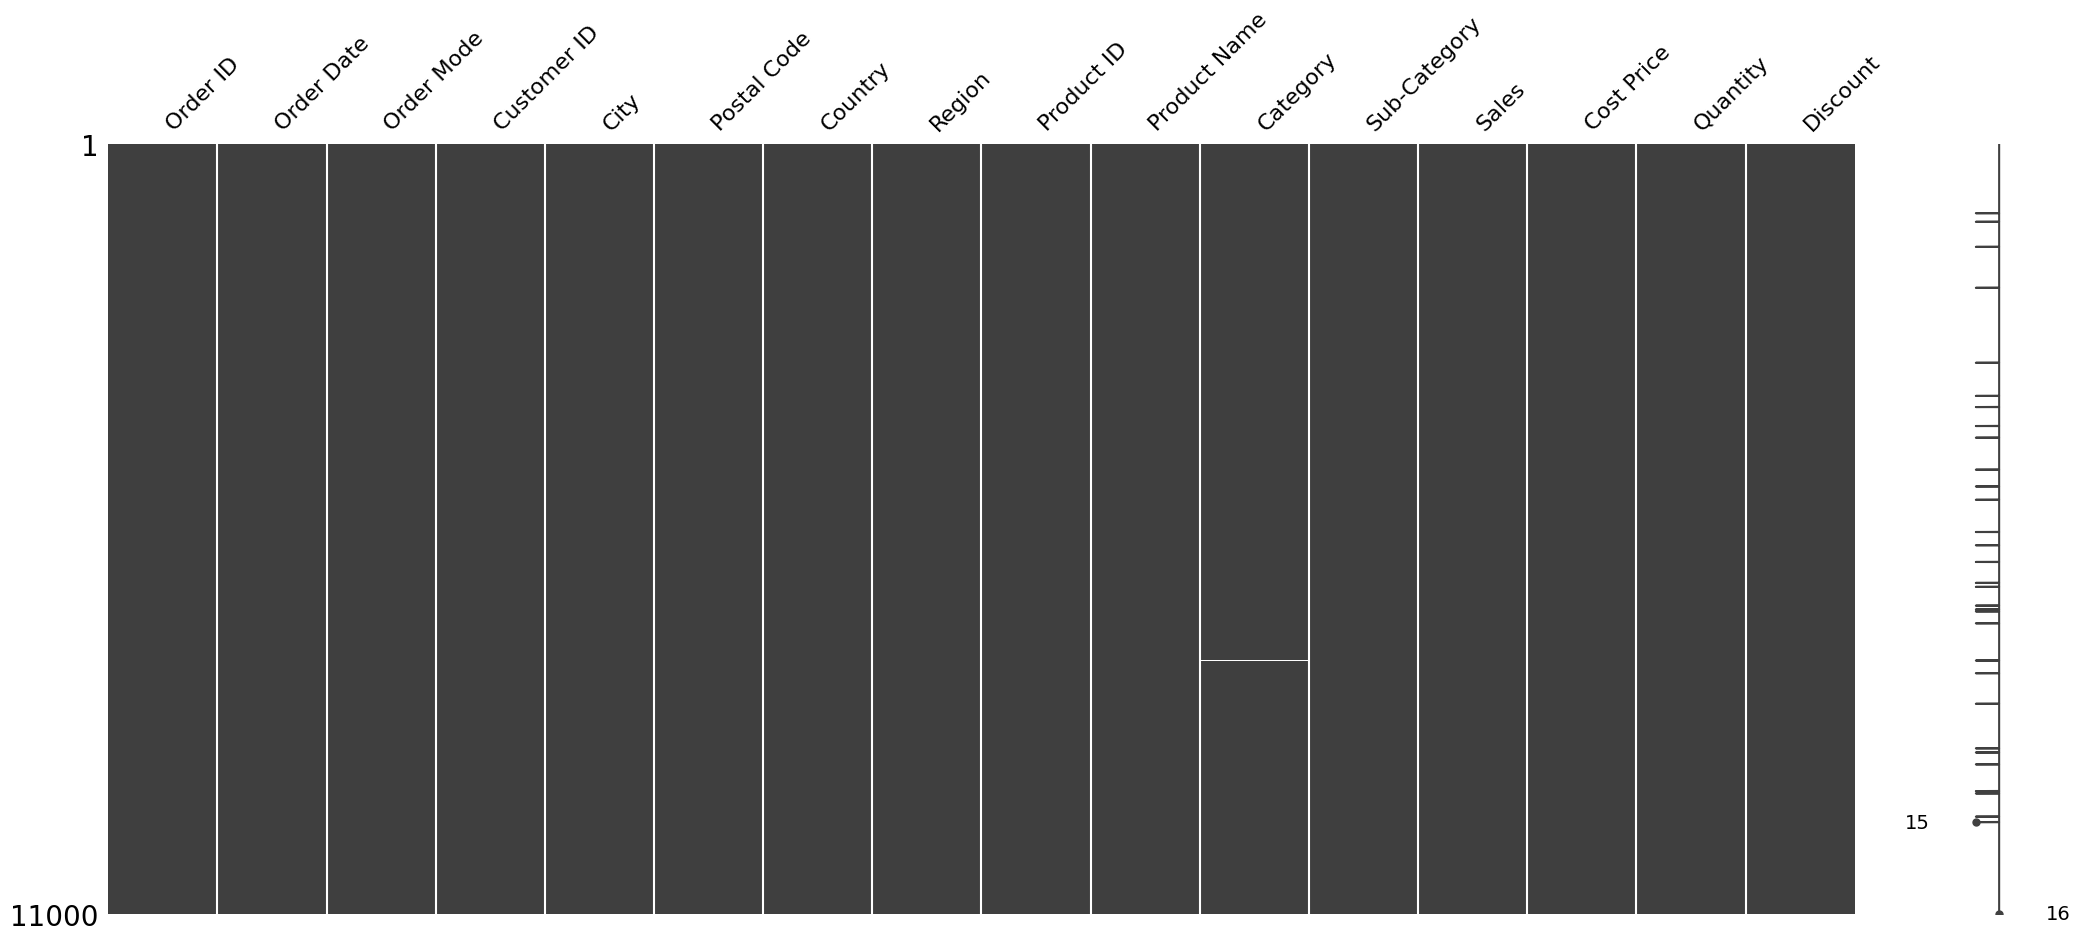

In [30]:
import missingno as msno
msno.matrix(sales_df)

### 1.7.2 Check Unknowns

In [31]:
# Count all 'Unknown' values column by column
unknown_counts = (sales_df == 'Unknown').sum()
unknown_counts[unknown_counts > 0]

,0


## 1.8 Final Fixes

### 1.8.1 Category

In [32]:
sales_df[sales_df['Category'].isnull()]

,Order ID,Order Date,Order Mode,Customer ID,City,Postal Code,Country,Region,Product ID,Product Name,Category,Sub-Category,Sales,Cost Price,Quantity,Discount
988,GBD-331125,5/13/2024,Online,FQ069496,Preston,PR1,Scotland,East of England,01JZ3N51WA4J6K3NJAHGZ77S13,Chili Con Carne Mix,NaN,Seasoning Mixes,2.99,0.897,19,0.07
1111,WGO-397655,2/2/2024,In-Store,WX098476,Newtown,RG20,Scotland,East of England,01JZ3NR4GWSBB8JK7S9CM60J6A,Biodegradable Dog Waste Bags,NaN,Dog Supplies,14.99,5.996,2,0.40
1469,QQE-171296,6/3/2024,In-Store,ZM096349,Milton,NG22,Scotland,East of England,01JZ3NTAWDN18VKEF89NEMSDJX,Digital Voice Recorder,NaN,Audio Recording Devices,49.99,19.996,2,0.14
2054,PJI-129995,3/29/2025,Online,AC082690,Carlton,DL8,Scotland,East of England,01JZ3NR4GWSBB8JK7S9CM60J6A,Biodegradable Dog Waste Bags,NaN,Dog Supplies,16.41,6.996,10,0.19
3125,ZAG-531130,1/3/2024,In-Store,QJ084755,London,EC1V,Scotland,North West,01JZ3N5C2EB7MTZZYJMR2ZK923,Sunflower Seeds,NaN,Seeds & Nuts,2.99,0.897,12,0.08
3598,LXN-635094,9/5/2024,Online,QJ084755,Horton,BS37,Scotland,North West,01JZ3N5C2EB7MTZZYJMR2ZK923,Sunflower Seeds,NaN,Seeds & Nuts,2.99,0.897,20,0.00
3757,WDD-602015,7/25/2024,In-Store,QJ084755,Sutton,CT15,England,South East,01JZ3N5C2EB7MTZZYJMR2ZK923,Sunflower Seeds,NaN,Seeds & Nuts,2.99,0.897,8,0.05
4028,OFB-020382,12/9/2024,Online,QU063405,Middleton,LE16,Wales,West Midlands,01JZ3NR4GWSBB8JK7S9CM60J6A,Biodegradable Dog Waste Bags,NaN,Dog Supplies,15.99,5.996,3,0.17
4195,BEC-725501,8/27/2024,In-Store,QY078216,London,WC1B,Scotland,North West,01JZ3NR4GWSBB8JK7S9CM60J6A,Biodegradable Dog Waste Bags,NaN,Dog Supplies,15.99,5.996,10,0.17
4652,COL-778719,1/3/2024,Online,QO062851,Bristol,BS41,England,East Midlands,01JZ3NR4GWSBB8JK7S9CM60J6A,Biodegradable Dog Waste Bags,NaN,Dog Supplies,15.99,5.996,17,0.16


### 1.8.2 Manual Fixes

In [33]:
# Define manual fixes
manual_category_map = {
    'Seasoning Mixes': 'Food - Spices',
    'Healthy Meals': 'Food - Ready Meals',
    'Audio Recording Devices': 'Electronics',
    'Seeds & Nuts': 'Food - Snacks',
    'Dog Supplies': 'Pet Supplies'
}

# Apply to rows where Category is missing
sales_df['Category'] = sales_df.apply(
    lambda row: manual_category_map.get(row['Sub-Category'], row['Category'])
    if pd.isnull(row['Category']) else row['Category'],
    axis=1
)

### 1.8.3 Fix Incorrect Regions

In [34]:
# Load the store locations dataset
store_df = pd.read_csv('/content/drive/My Drive/RDAMP Internship/Task 1/Store Locations(Store Locations).csv')

# Preview the columns to check what we can join on
store_df.columns, sales_df.columns

(Index(['City', 'Postal Code', 'Country', 'Region'], dtype='object'),
 Index(['Order ID', 'Order Date', 'Order Mode', 'Customer ID', 'City',
        'Postal Code', 'Country', 'Region', 'Product ID', 'Product Name',
        'Category', 'Sub-Category', 'Sales', 'Cost Price', 'Quantity',
        'Discount'],
       dtype='object'))

In [43]:
original_sales_df = sales_df.copy()

# Merge on Postal Code to bring correct Region info into sales_df
sales_df = sales_df.merge(
    store_df[['Postal Code', 'Region']],
    on='Postal Code',
    how='left',
    suffixes=('', '_Corrected')
)

# Replace original Region with corrected one if available
sales_df['Region'] = sales_df['Region_Corrected'].combine_first(sales_df['Region'])

# Drop the helper column
sales_df.drop(columns=['Region_Corrected'], inplace=True)

### 1.8.4 Split Category -> Category + Segment

In [36]:
# Split Category column
split_cat = sales_df['Category'].str.split('-', n=1, expand=True)

# If only one column was returned (i.e. no hyphens present)
if split_cat.shape[1] == 1:
    # Assign the existing Category and set Segment as 'General'
    sales_df['Segment'] = 'General'
else:
    # Assign split columns
    sales_df['Category'] = split_cat[0]
    sales_df['Segment'] = split_cat[1].fillna('General')

## 1.9 Check for Errors

### 1.9.1 Visualise Missing Values

<Axes: >

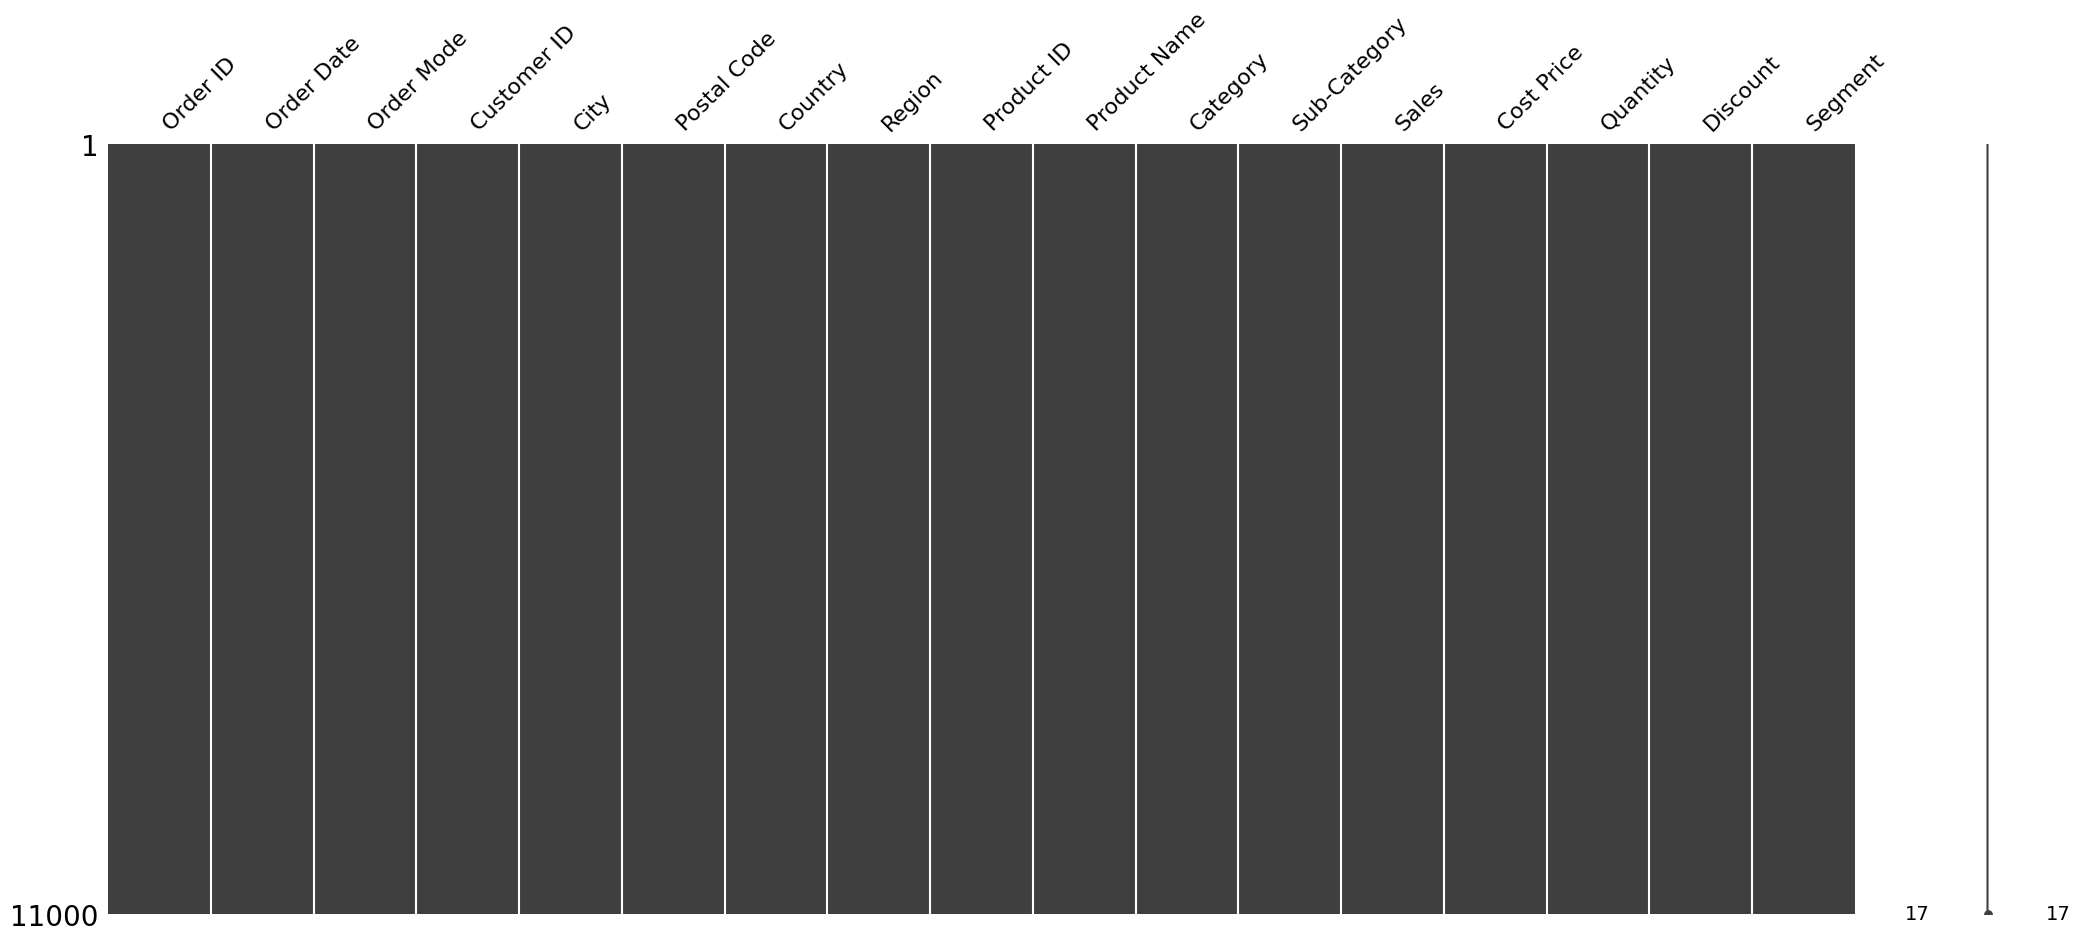

In [44]:
import missingno as msno
msno.matrix(sales_df)

### 1.9.2 Check for Unknowns and is nulls

In [45]:
# Ensure no Category or Segment is null
print(sales_df[['Category', 'Segment']].isnull().sum())

# Optional: Check for 'Unknown' again
unknowns = (sales_df == 'Unknown').sum()
print(unknowns[unknowns > 0])

Category    0
Segment     0
dtype: int64
Series([], dtype: int64)


### 1.9.3 Check for Duplicates

In [47]:
duplicates = sales_df.duplicated().sum()
print(f"Duplicate rows: {duplicates}")

Duplicate rows: 0


### 1.9.4 Validate Join Integrity

In [46]:
print(f"Original rows: {len(original_sales_df)}")
print(f"Post-merge rows: {len(sales_df)}")

Original rows: 11000
Post-merge rows: 11000


### 1.9.5 Data Type Validation

In [42]:
print(sales_df.dtypes)

Order ID         object
Order Date       object
Order Mode       object
Customer ID      object
City             object
Postal Code      object
Country          object
Region           object
Product ID       object
Product Name     object
Category         object
Sub-Category     object
Sales           float64
Cost Price      float64
Quantity          int64
Discount        float64
Segment          object
dtype: object


## 1.8 Final Headshot

In [39]:
sales_df.head()

,Order ID,Order Date,Order Mode,Customer ID,City,Postal Code,Country,Region,Product ID,Product Name,Category,Sub-Category,Sales,Cost Price,Quantity,Discount,Segment
0,BTC-245712,6/22/2024,Online,LO028977,Norton,S8,England,Yorkshire and the Humber,01JZ3N512GHNAJSF3HCCQ0PQYY,Flavored Popcorn Mix,Food,Gourmet Snacks,2.99,0.897,4,0.24,Snacks
1,NZR-891212,3/15/2024,In-Store,OH046670,West End,DN36,England,East Midlands,01JZ3N56DDVK7Y600QGH2M6T1X,Olive Oil,Food,Cooking Oils,7.99,2.397,16,0.32,Cooking Oils
2,TDN-811093,2/29/2024,Online,FH015492,Newtown,RG20,Scotland,South East,01JZ3N53A64TW72TVK28SMMXKX,Children's Backpack,Accessories,Kids' Bags,29.99,8.997,2,0.09,General
3,MIX-746378,10/25/2024,In-Store,ZZ015342,East End,BH21,Scotland,North West,01JZ3N572S4RVA29Y33YRWH174,Honey Butter Popcorn,Food,Gourmet Snacks,2.99,0.897,4,0.01,Snacks
4,UGI-201465,8/18/2024,Online,TV075977,Seaton,LE15,Scotland,East Midlands,01JZ3N52RT7CJNB27BFS6H8BF7,Sliced Cucumbers,Food,Fresh Cut Vegetables,1.29,0.387,11,0.34,Produce
